In [2]:
import pandas as pd
import glob
from matplotlib import pyplot as plt
import numpy as np

from tensorflow.keras.models import load_model
%matplotlib inline

# model = load_model("Bahreain[50, 20, 40].h5")

from preparing_data_set import dataset_preparation
from building_model import build_model_cnn_lstm
import numpy as np
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV




# df=pd.read_excel()



df= pd.read_excel('./InputData/BHR CC_h_20170501-20190704.xlsx')

In [3]:
x_train,x_test,y_train,y_test = dataset_preparation(df)

     Year  Month  Week  Day        Date  Traffic
0    2017     11   450  300  2017-11-08    200.0
1    2017     11   450  400  2017-11-09    256.0
2    2017     11   450  500  2017-11-10    346.0
3    2017     11   450  600  2017-11-11    207.0
4    2017     11   450  700  2017-11-12    117.0
..    ...    ...   ...  ...         ...      ...
599  2019      6   260  700  2019-06-30    394.0
600  2019      7   270  100  2019-07-01    380.0
601  2019      7   270  200  2019-07-02    411.0
602  2019      7   270  300  2019-07-03    445.0
603  2019      7   270  400  2019-07-04    466.0

[604 rows x 6 columns]
363.4707233291061


In [16]:
model1= build_model_cnn_lstm(x_train,y_train,config=[24,40,56],filepath='Bahrein.h5')

In [4]:
model1 = load_model("Bahreain[24, 64, 48].h5")

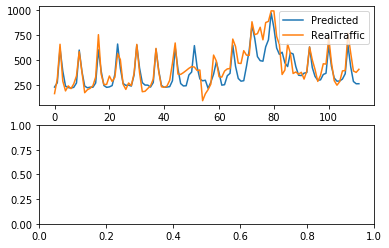

In [5]:
fig,ax = plt.subplots(2,1)
ax[0].plot(np.concatenate(model1.predict(x_test[0::7]).reshape(-1,7)),label='Predicted')
ax[0].plot(np.concatenate(y_test[0::7]),label="RealTraffic")
ax[0].legend()

In [19]:
prediction_vector = np.concatenate(model1.predict(x_test[0::7]).reshape(-1,7))
    
rel_vert_loc =int(0.8 * y_test.max())


real_traffic = np.concatenate(y_test[0::7])
abs_error = np.abs(prediction_vector - real_traffic)

max_error = abs_error.max()
max_at = abs_error.argmax()

mean_error = abs_error.mean()

median_error = np.median(abs_error)



max_error,mean_error,median_error

(333.9648132324219, 77.36857542913698, 53.63100507050248)

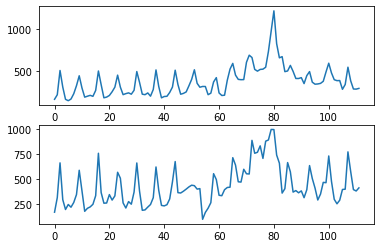

In [11]:
fig,ax = plt.subplots(2,1)
ax[0].plot(np.concatenate(model1.predict(x_test[0::7]).reshape(-1,7)),label='Trainiing')
ax[1].plot(np.concatenate(y_test[0::7]))

In [6]:
x_test.shape

(108, 7, 4)

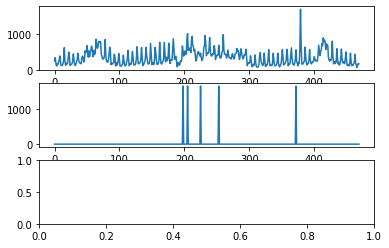

In [7]:
fig,ax1 = plt.subplots(3,1)
ax1[0].plot(x_train[:,1,0])
ax1[1].plot(x_train[:,1,1])

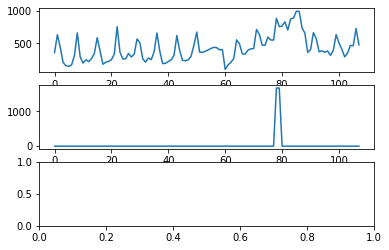

In [8]:
fig,ax1 = plt.subplots(3,1)
ax1[0].plot(x_test[:,1,0])
ax1[1].plot(x_test[:,1,1])

In [12]:
x_train[:,1,0].mean() *4

1400.6127659574468

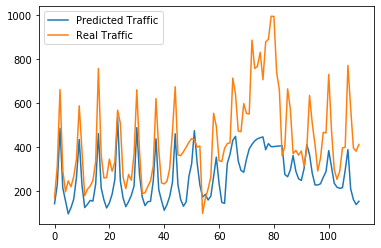

In [13]:
plt.plot(np.concatenate(model1.predict(x_test[0::7]).reshape(-1,7)),label='Predicted Traffic')
plt.plot(np.concatenate(y_test[0::7]),label='Real Traffic')
plt.legend()

In [11]:
prediction_vector = np.concatenate(model1.predict(x_test[0::7]).reshape(-1,7))
    
rel_vert_loc =int(0.8 * y_test.max())


real_traffic = np.concatenate(y_test[0::7])
abs_error = np.abs(prediction_vector - real_traffic)

max_error = abs_error.max()
max_at = abs_error.argmax()

mean_error = abs_error.mean()

median_error = np.median(abs_error)



max_error,mean_error,median_error

(533.0200805664062, 160.23052020430106, 138.1789020121762)

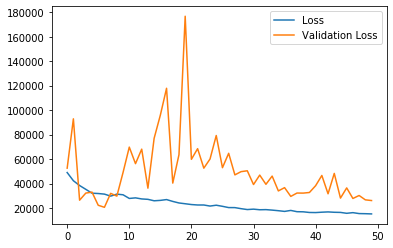

In [9]:
plt.plot(model1.history.history['loss'],label='Loss')
plt.plot(model1.history.history['val_loss'],label='Validation Loss')
plt.legend()

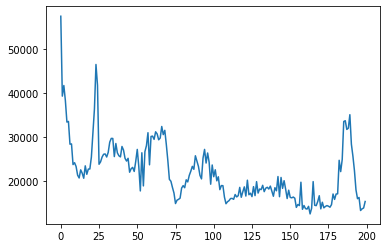

In [10]:
plt.plot(model1.history.history['val_loss'])


In [15]:
model1= build_model_cnn_lstm(x_train,y_train,x_test,y_test,config=[50,12,20],filepath='Bahrein.h5')

W0814 13:33:45.987983 139800886548224 callbacks.py:859] `period` argument is deprecated. Please use `save_freq` to specify the frequency in number of samples seen.


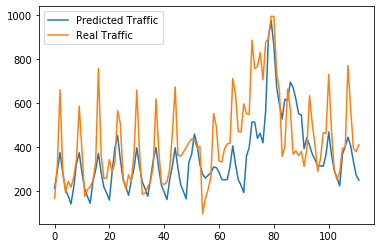

In [16]:
plt.plot(np.concatenate(model1.predict(x_test[0::7]).reshape(-1,7)),label='Predicted Traffic')
plt.plot(np.concatenate(y_test[0::7]),label='Real Traffic')
plt.legend()

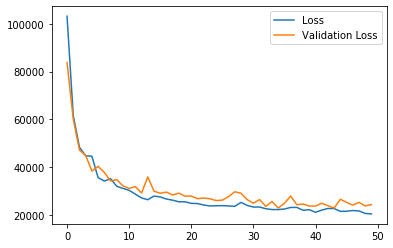

In [17]:
plt.plot(model1.history.history['loss'],label='Loss')
plt.plot(model1.history.history['val_loss'],label='Validation Loss')
plt.legend()

In [ ]:
#latest

In [52]:
model1= build_model_cnn_lstm(x_train,y_train,x_test,y_test,config=[400,12,20],filepath='Bahrein.h5')

W0814 13:55:18.121420 139800886548224 callbacks.py:859] `period` argument is deprecated. Please use `save_freq` to specify the frequency in number of samples seen.


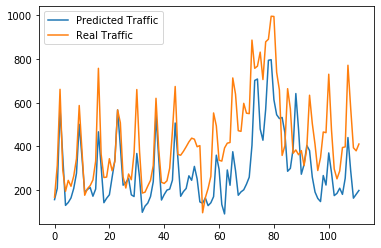

In [53]:
plt.plot(np.concatenate(model1.predict(x_test[0::7]).reshape(-1,7)),label='Predicted Traffic')
plt.plot(np.concatenate(y_test[0::7]),label='Real Traffic')
plt.legend()

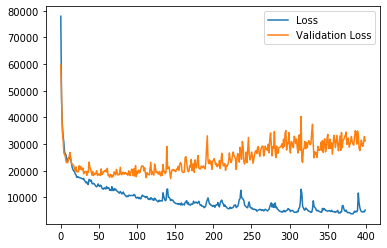

In [54]:
plt.plot(model1.history.history['loss'],label='Loss')
plt.plot(model1.history.history['val_loss'],label='Validation Loss')
plt.legend()

In [24]:
# increase model 
model1= build_model_cnn_lstm(x_train,y_train,x_test,y_test,config=[100,24,20],filepath='Bahrein.h5')

W0814 13:43:59.500291 139800886548224 callbacks.py:859] `period` argument is deprecated. Please use `save_freq` to specify the frequency in number of samples seen.


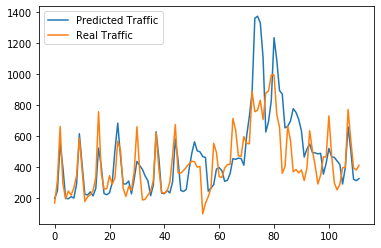

In [25]:
plt.plot(np.concatenate(model1.predict(x_test[0::7]).reshape(-1,7)),label='Predicted Traffic')
plt.plot(np.concatenate(y_test[0::7]),label='Real Traffic')
plt.legend()

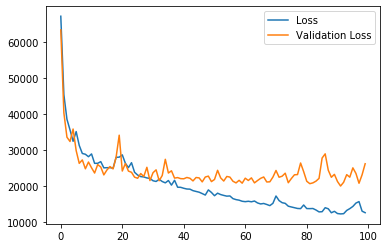

In [26]:
plt.plot(model1.history.history['loss'],label='Loss')
plt.plot(model1.history.history['val_loss'],label='Validation Loss')
plt.legend()

In [27]:
model1= build_model_cnn_lstm(x_train,y_train,x_test,y_test,config=[100,24,48],filepath='Bahrein.h5')

W0814 13:45:16.137667 139800886548224 callbacks.py:859] `period` argument is deprecated. Please use `save_freq` to specify the frequency in number of samples seen.


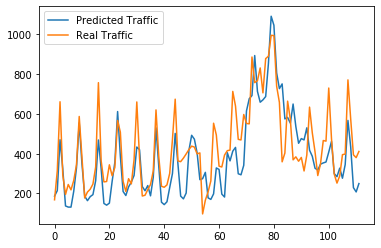

In [28]:
plt.plot(np.concatenate(model1.predict(x_test[0::7]).reshape(-1,7)),label='Predicted Traffic')
plt.plot(np.concatenate(y_test[0::7]),label='Real Traffic')
plt.legend()

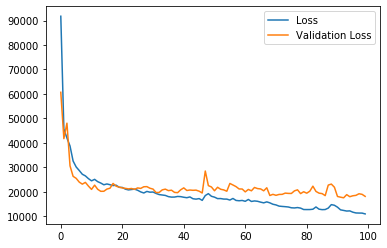

In [29]:
plt.plot(model1.history.history['loss'],label='Loss')
plt.plot(model1.history.history['val_loss'],label='Validation Loss')
plt.legend()

In [23]:
model1= build_model_cnn_lstm(x_train,y_train,x_test,y_test,config=[100,160,240],filepath='Bahrein.h5')

W0814 14:35:30.264414 140517303916288 callbacks.py:859] `period` argument is deprecated. Please use `save_freq` to specify the frequency in number of samples seen.


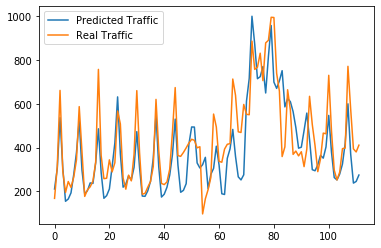

In [13]:
plt.plot(np.concatenate(model1.predict(x_test[0::7]).reshape(-1,7)),label='Predicted Traffic')
plt.plot(np.concatenate(y_test[0::7]),label='Real Traffic')
plt.legend()

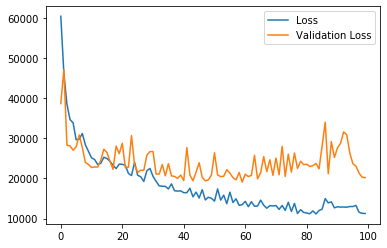

In [14]:
plt.plot(model1.history.history['loss'],label='Loss')
plt.plot(model1.history.history['val_loss'],label='Validation Loss')
plt.legend()

In [15]:
np.sqrt(model1.history.history['loss'][-1]),np.sqrt(model1.history.history['val_loss'][-1])

(106.09640856193339, 142.10524368269475)

In [16]:
prediction_vector = np.concatenate(model1.predict(x_test[0::7]).reshape(-1,7))
    
rel_vert_loc =int(0.8 * y_test.max())


real_traffic = np.concatenate(y_test[0::7])
abs_error = np.abs(prediction_vector - real_traffic)

max_error = abs_error.max()
max_at = abs_error.argmax()

mean_error = abs_error.mean()

median_error = np.median(abs_error)



max_error,mean_error,median_error

(392.19482421875, 94.58593853894256, 69.02844272262541)

In [22]:
np.sum(prediction_vector - real_traffic)

-4867.559291903095

In [21]:
np.concatenate(y_test[0::7]).mean()

431.24390081053616

In [7]:
dir(model1)

['_TF_MODULE_IGNORED_PROPERTIES',
 '__call__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_activity_regularizer',
 '_add_inbound_node',
 '_add_unique_metric_name',
 '_add_variable_with_custom_getter',
 '_all_metrics_tensors',
 '_assert_compile_was_called',
 '_assert_weights_created',
 '_base_init',
 '_build_input_shape',
 '_cache_output_metric_attributes',
 '_call_arg_was_passed',
 '_call_convention',
 '_call_fn_args',
 '_callable_losses',
 '_check_trainable_weights_consistency',
 '_checkpoint_dependencies',
 '_clear_losses',
 '_cloning',
 '_collect_input_masks',
 '_collected_trainable_weights',
 '_compile_distribution',
 '_compile_eagerly',
 '_compile_metric_fun

In [11]:
model1.trainable_variables

[<tf.Variable 'conv1d/kernel:0' shape=(3, 4, 96) dtype=float32, numpy=
 array([[[-0.02550318, -0.10513282,  0.15647568, ..., -0.06694902,
          -0.12581997,  0.03153896],
         [-0.12031728,  0.04549493,  0.01483854, ..., -0.03995798,
          -0.07214853, -0.05057341],
         [ 0.11381821, -0.03984428, -0.05173572, ..., -0.0631988 ,
           0.10575464, -0.29421896],
         [ 0.16396016, -0.08829907, -0.08920507, ...,  0.09945996,
           0.02401498, -0.19190286]],
 
        [[ 0.03813378, -0.11288542, -0.01719354, ...,  0.02655382,
          -0.16697906,  0.00986701],
         [ 0.04019725, -0.08355549, -0.0826742 , ..., -0.01817807,
           0.1343661 ,  0.001266  ],
         [ 0.3843369 ,  0.05975223,  0.67301065, ...,  0.10649431,
           0.01571328, -0.4341297 ],
         [-0.04187501,  0.05130067,  0.06012212, ...,  0.00598526,
           0.26265058, -0.16234297]],
 
        [[-0.01971647, -0.0751213 , -0.12459848, ..., -0.05662908,
          -0.02252067,  

In [10]:
model1.weights

[<tf.Variable 'conv1d/kernel:0' shape=(3, 4, 96) dtype=float32, numpy=
 array([[[-0.02550318, -0.10513282,  0.15647568, ..., -0.06694902,
          -0.12581997,  0.03153896],
         [-0.12031728,  0.04549493,  0.01483854, ..., -0.03995798,
          -0.07214853, -0.05057341],
         [ 0.11381821, -0.03984428, -0.05173572, ..., -0.0631988 ,
           0.10575464, -0.29421896],
         [ 0.16396016, -0.08829907, -0.08920507, ...,  0.09945996,
           0.02401498, -0.19190286]],
 
        [[ 0.03813378, -0.11288542, -0.01719354, ...,  0.02655382,
          -0.16697906,  0.00986701],
         [ 0.04019725, -0.08355549, -0.0826742 , ..., -0.01817807,
           0.1343661 ,  0.001266  ],
         [ 0.3843369 ,  0.05975223,  0.67301065, ...,  0.10649431,
           0.01571328, -0.4341297 ],
         [-0.04187501,  0.05130067,  0.06012212, ...,  0.00598526,
           0.26265058, -0.16234297]],
 
        [[-0.01971647, -0.0751213 , -0.12459848, ..., -0.05662908,
          -0.02252067,  

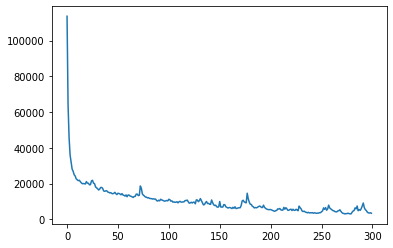

In [5]:
plt.plot(model1.history.history['loss'])

In [7]:
np.sqrt(model1.history.history['loss'][-1])

58.37177631817435

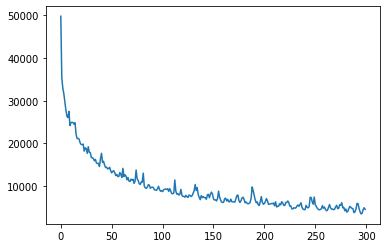

In [6]:
plt.plot(model1.history.history['loss'])

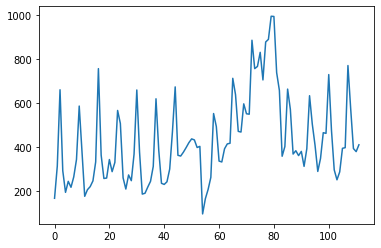

In [28]:
plt.plot(np.concatenate(y_test[0::7]))

In [29]:
np.concatenate(y_test[0::7]).mean()

431.24390081053616

In [25]:
prediction_vector = np.concatenate(model1.predict(x_test[0::7]).reshape(-1,7))
    
rel_vert_loc =int(0.8 * y_test.max())


real_traffic = np.concatenate(y_test[0::7])
abs_error = np.abs(prediction_vector - real_traffic)

max_error = abs_error.max()
max_at = abs_error.argmax()

mean_error = abs_error.mean()

median_error = np.median(abs_error)



max_error,mean_error,median_error

(463.31103515625, 107.597001363387, 76.7041015625)

In [13]:
model1= build_model_cnn_lstm(x_train,y_train,x_test,y_test,config=[100,48,120],filepath='Bahrein.h5')

W0813 22:41:13.756809 140238522480384 callbacks.py:859] `period` argument is deprecated. Please use `save_freq` to specify the frequency in number of samples seen.


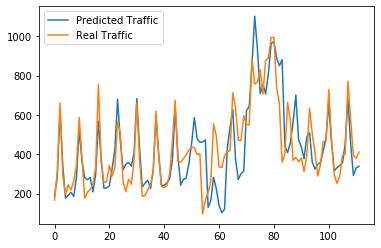

In [14]:
plt.plot(np.concatenate(model1.predict(x_test[0::7]).reshape(-1,7)),label='Predicted Traffic')
plt.plot(np.concatenate(y_test[0::7]),label='Real Traffic')
plt.legend()

In [21]:
model1= build_model_cnn_lstm(x_train,y_train,x_test,y_test,config=[600,48,240],filepath='Bahrein.h5')

W0813 22:57:49.411601 140238522480384 callbacks.py:859] `period` argument is deprecated. Please use `save_freq` to specify the frequency in number of samples seen.


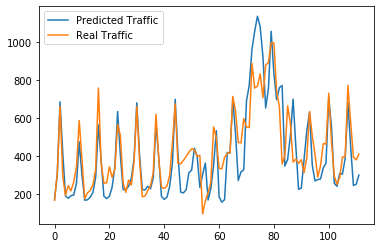

In [16]:
plt.plot(np.concatenate(model1.predict(x_test[0::7]).reshape(-1,7)),label='Predicted Traffic')
plt.plot(np.concatenate(y_test[0::7]),label='Real Traffic')
plt.legend()

In [19]:
prediction_vector = np.concatenate(model1.predict(x_test[0::7]).reshape(-1,7))
    
rel_vert_loc =int(0.8 * y_test.max())


real_traffic = np.concatenate(y_test[0::7])
abs_error = np.abs(prediction_vector - real_traffic)

max_error = abs_error.max()
max_at = abs_error.argmax()

mean_error = abs_error.mean()

median_error = np.median(abs_error)



max_error,mean_error,median_error

(411.056396484375, 95.36635543103033, 68.7523422241211)

In [20]:
max_at

83

In [9]:
dir(model1)

['_TF_MODULE_IGNORED_PROPERTIES',
 '__call__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_activity_regularizer',
 '_add_inbound_node',
 '_add_unique_metric_name',
 '_add_variable_with_custom_getter',
 '_all_metrics_tensors',
 '_assert_compile_was_called',
 '_assert_weights_created',
 '_base_init',
 '_build_input_shape',
 '_cache_output_metric_attributes',
 '_call_arg_was_passed',
 '_call_convention',
 '_call_fn_args',
 '_callable_losses',
 '_check_trainable_weights_consistency',
 '_checkpoint_dependencies',
 '_clear_losses',
 '_cloning',
 '_collect_input_masks',
 '_collected_trainable_weights',
 '_compile_distribution',
 '_compile_eagerly',
 '_compile_metric_fun

In [10]:
model1.history.history

{'loss': [37188.43338493185,
  30494.270676633147,
  27673.41296854222,
  25780.78704808012,
  23622.56360408702,
  24648.53709781728,
  23949.950451790017,
  21688.146249714304,
  20557.452082857173,
  20966.999427373357],
 'val_loss': [30027.098438404224,
  30809.696768301506,
  34731.7133291739,
  38974.3505452474,
  32643.983981662328,
  32082.787163628473,
  36317.89226164641,
  34935.32460756655,
  38310.45691370081,
  35984.41468641493]}

# TESTING MODELS

In [8]:
import time

In [9]:
results_ = []

In [10]:
results_ = []
for filename in glob.glob('*.h5'):
    time.sleep(1)
    model = load_model(filename)
    
    prediction_vector = np.concatenate(model.predict(x_test[0::7]).reshape(-1,7))
    
    rel_vert_loc =int(0.8 * y_test.max())
    
    
    real_traffic = np.concatenate(y_test[0::7])
    abs_error = np.abs(prediction_vector - real_traffic)
    
    max_error = abs_error.max()
    max_at = abs_error.argmax()
    
    mean_error = abs_error.mean()
    
    median_error = np.median(abs_error)
    
    image_name = filename[:-3] + '.png'
    
    fig, ax = plt.subplots(1,1, figsize=(15,10))

    fig.suptitle('This is configuration {}'.format(filename), fontsize=16)
    ax.plot(np.concatenate(y_test[0::7]),label='Real Traffic')
    ax.plot(np.concatenate(model.predict(x_test[0::7]).reshape(-1,7)),label='Predicted Traffic') 
    ax.legend()
    
    ax.annotate("Mean error per day is: {}".format(int(mean_error)), (10,rel_vert_loc))
    ax.annotate("Max error per day is: {}".format(int(max_error)), xy=(max_at,int(np.concatenate(y_test[0::7])[max_at])), xytext=(int(0.8*max_at),rel_vert_loc-30),
               arrowprops=dict(facecolor='black', shrink=0.05))
    
    ax.annotate("Median error per day is: {}".format(int(median_error)), (10,int(0.75*rel_vert_loc)))
#     ax.legend()

    results_.append((max_error,mean_error,median_error,filename))
    
    plt.savefig(image_name)
    plt.close()
    
    
    
    
    
    
    
    
    
    
    
    
    

In [12]:
results_1 = pd.DataFrame(results_,columns=['max_error','mean_error','median_error','configuration'])

In [13]:
results_1.to_csv('results_grid_search.csv',index=False)

In [16]:
results_1[results_1.median_error == results_1.median_error.min()]

,max_error,mean_error,median_error,configuration
27,333.964813,77.368575,53.631005,"Bahreain[24, 64, 48].h5"


In [10]:
model1= build_model_cnn_lstm(x_tr,y_tr,config=[200,48,80])

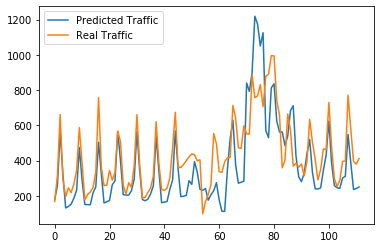

In [15]:

plt.plot(np.concatenate(model1.predict(x_test[0::7]).reshape(-1,7)),label='Predicted Traffic')
plt.plot(np.concatenate(y_ts[0::7]),label='Real Traffic')
plt.legend()

In [16]:
model1= build_model_cnn_lstm(x_tr,y_tr,config=[200,48,80])

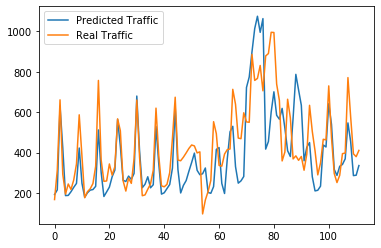

In [17]:

plt.plot(np.concatenate(model1.predict(x_test[0::7]).reshape(-1,7)),label='Predicted Traffic')
plt.plot(np.concatenate(y_ts[0::7]),label='Real Traffic')
plt.legend()

In [25]:
glob.glob('*.h5')

['Bahreain[24, 73, 60].h5',
 'Bahreain[24, 48, 60].h5',
 'Bahreain[24, 36, 34].h5',
 'Bahreain[24, 48, 80].h5',
 'Bahreain[24, 56, 48].h5',
 'Bahreain[24, 56, 80].h5',
 'Bahreain[24, 48, 48].h5',
 'Bahreain[24, 56, 42].h5',
 'Bahreain[24, 64, 72].h5',
 'Bahreain[24, 40, 56].h5',
 'Bahreain[24, 32, 56].h5',
 'Bahreain[24, 40, 80].h5',
 'Bahreain[24, 40, 48].h5',
 'Bahreain[24, 40, 30].h5',
 'Bahreain[24, 48, 72].h5',
 'Bahreain[24, 64, 30].h5',
 'Bahreain[24, 64, 56].h5',
 'Bahreain[24, 73, 80].h5',
 'Bahreain[24, 40, 72].h5',
 'Bahreain[24, 40, 42].h5',
 'Bahreain[24, 36, 48].h5',
 'Bahreain[24, 56, 30].h5',
 'Bahreain[24, 36, 56].h5',
 'Bahreain[24, 56, 60].h5',
 'Bahreain[24, 36, 72].h5',
 'Bahreain[24, 36, 42].h5',
 'Bahreain[24, 73, 56].h5',
 'Bahreain[24, 64, 48].h5',
 'Bahreain[24, 36, 60].h5',
 'Bahreain[24, 64, 60].h5',
 'Bahreain[24, 64, 34].h5',
 'Bahreain[24, 32, 60].h5',
 'Bahreain[24, 48, 42].h5',
 'Bahreain[24, 56, 56].h5',
 'Bahreain[24, 48, 56].h5',
 'Bahreain[24, 64, 8

In [15]:
model1= build_model_cnn_lstm(x_train,x_test,y_train,y_test,config=[300,48,80],filepath='Bahrein.h5')

W0814 10:10:38.279241 140068069115648 callbacks.py:859] `period` argument is deprecated. Please use `save_freq` to specify the frequency in number of samples seen.


ValueError: cannot reshape array of size 3024 into shape (108,7,1)

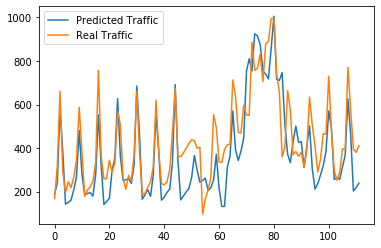

In [14]:
plt.plot(np.concatenate(model1.predict(x_test[0::7]).reshape(-1,7)),label='Predicted Traffic')
plt.plot(np.concatenate(y_test[0::7]),label='Real Traffic')
plt.legend()

In [37]:
model1= build_model_cnn_lstm(x_tr,y_tr,config=[600,24,320])

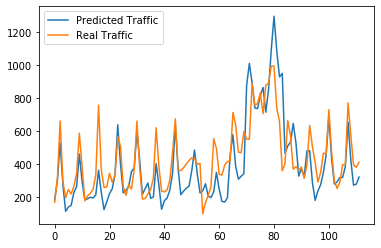

In [38]:
plt.plot(np.concatenate(model1.predict(x_test[0::7]).reshape(-1,7)),label='Predicted Traffic')
plt.plot(np.concatenate(y_ts[0::7]),label='Real Traffic')
plt.legend()

In [10]:
model1= build_model_cnn_lstm(x_train,y_train,x_test,y_test,config=[400,48,240])

W0814 09:22:08.836522 140068069115648 callbacks.py:859] `period` argument is deprecated. Please use `save_freq` to specify the frequency in number of samples seen.


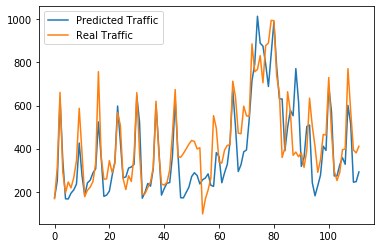

In [9]:
plt.plot(np.concatenate(model1.predict(x_test[0::7]).reshape(-1,7)),label='Predicted Traffic')
plt.plot(np.concatenate(y_test[0::7]),label='Real Traffic')
plt.legend()

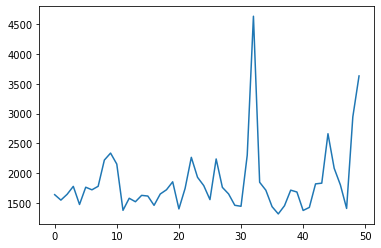

In [42]:
plt.plot(model1.history.history['loss'][-50:])

In [47]:
np.sqrt(1200)

34.64101615137755

In [45]:
prediction_vector = np.concatenate(model1.predict(x_test[0::7]).reshape(-1,7))
    
rel_vert_loc =int(0.8 * y_ts.max())


real_traffic = np.concatenate(y_ts[0::7])
abs_error = np.abs(prediction_vector - real_traffic)

max_error = abs_error.max()
max_at = abs_error.argmax()

mean_error = abs_error.mean()

median_error = np.median(abs_error)



max_error,mean_error,median_error

In [51]:
x_tr.shape,x_test.shape

((470, 7, 4), (108, 7, 4))

In [53]:
np.concatenate(x_tr,x_test, axis=0)

TypeError: only integer scalar arrays can be converted to a scalar index

In [60]:
%matplotlib inline
prediction_vector = np.concatenate(model1.predict(x_test[0::7]).reshape(-1,7))
    
rel_vert_loc =int(0.8 * y_ts.max())


real_traffic = np.concatenate(y_ts[0::7])
abs_error = np.abs(prediction_vector - real_traffic)

max_error = abs_error.max()
max_at = abs_error.argmax()

mean_error = abs_error.mean()

median_error = np.median(abs_error)

image_name = 'trial_model' + '.png'

fig, ax = plt.subplots(figsize=(15,10))

fig.suptitle('This is configuration {}'.format(filename), fontsize=16)
ax.plot(np.concatenate(y_ts[0::7]),label='Real Traffic')
ax.plot(np.concatenate(model.predict(x_test[0::7]).reshape(-1,7)),label='Predicted Traffic') 
ax.legend()

ax.annotate("Mean error per day is: {}".format(int(mean_error)), (10,rel_vert_loc))
ax.annotate("Max error per day is: {}".format(int(max_error)), xy=(max_at,int(np.concatenate(y_ts[0::7])[max_at])), xytext=(int(0.8*max_at),rel_vert_loc-30),
           arrowprops=dict(facecolor='black', shrink=0.05))

ax.annotate("Median error per day is: {}".format(int(median_error)), (10,int(0.75*rel_vert_loc)))
#     ax.legend()

# results_.append((max_error,mean_error,median_error,filename))
plt.savefig(image_name)
plt.close()
    

In [49]:
image_name

'trial_model.png'

In [34]:
filename

'Bahreain[50, 20, 40].h5'

In [41]:
real_traffic = np.concatenate(y_ts[0::7])
abs_error = np.abs(prediction_vector - real_traffic)

max_error = abs_error.max()
max_at = abs_error.argmax()

mean_error = abs_error.mean()

median_error = np.median(abs_error)

image_name = filename[:-3] + '.png'

fig, ax = plt.subplots(1,1,figsize=(15,10))

In [42]:
%matplotlib

fig.suptitle('This is configuration {}'.format(filename), fontsize=16)
ax.plot(np.concatenate(y_ts[0::7]),label='Real Traffic')


Using matplotlib backend: agg


In [43]:
plt.show()